# Gradient Boosting

### Basic single model:
Adapted from [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html).

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
boston = load_boston()

X, y = shuffle(boston.data, boston.target, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [3]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

gb_r = ensemble.GradientBoostingRegressor(**params)

gb_r.fit(X_train, y_train)
mse = mean_squared_error(y_test, gb_r.predict(X_test))
print("MSE: %.4f" % mse)
print(gb_r.score(X_train, y_train))

MSE: 6.8995
0.982085564057


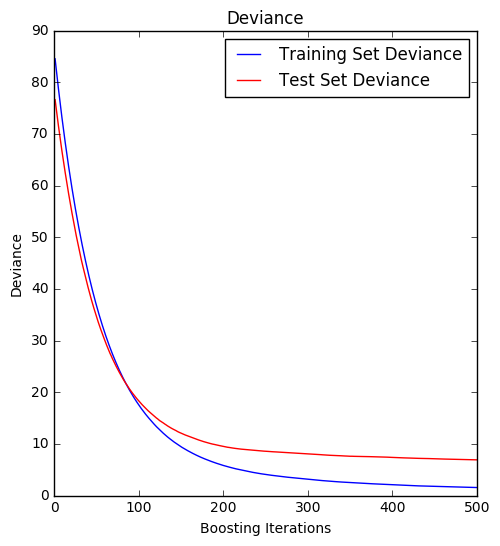

In [4]:
% matplotlib inline

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gb_r.staged_predict(X_test)):
    test_score[i] = gb_r.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_r.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

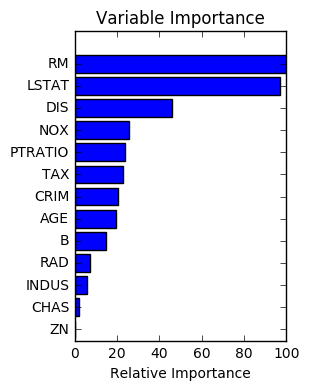

In [5]:
feature_importance = gb_r.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Grid search:

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': range(450, 551, 50),
              'max_depth': range(1, 12, 5),
              'min_samples_split': [2],
              'learning_rate': np.arange(0.01, .22, .1),
              'loss': ['ls']}

gb_r = GridSearchCV(GradientBoostingRegressor(), param_grid)
gb_r.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(450, 551, 50), 'learning_rate': array([ 0.01,  0.11,  0.21]), 'min_samples_split': [2], 'max_depth': range(1, 12, 5), 'loss': ['ls']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [7]:
sorted(gb_r.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_learning_rate',
 'param_loss',
 'param_max_depth',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [8]:
gb_r.cv_results_["mean_test_score"]

array([ 0.75442228,  0.76268285,  0.76918651,  0.81996093,  0.81901437,
        0.82142002,  0.73436823,  0.73635092,  0.73501031,  0.80660315,
        0.80616103,  0.80563684,  0.8240148 ,  0.8213075 ,  0.82093902,
        0.73278613,  0.73290275,  0.7272824 ,  0.80446394,  0.80458988,
        0.80392547,  0.80599475,  0.81564942,  0.80273214,  0.73449726,
        0.74348895,  0.736364  ])

In [9]:
best_index = np.argmax(gb_r.cv_results_["mean_test_score"])

In [10]:
gb_r.cv_results_["params"]

({'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 1,
  'min_samples_split': 2,
  'n_estimators': 450},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 1,
  'min_samples_split': 2,
  'n_estimators': 500},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 1,
  'min_samples_split': 2,
  'n_estimators': 550},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 6,
  'min_samples_split': 2,
  'n_estimators': 450},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 6,
  'min_samples_split': 2,
  'n_estimators': 500},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 6,
  'min_samples_split': 2,
  'n_estimators': 550},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 450},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 500},
 {'learning_rate': 0.01,
  'loss': 'ls',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 550},
 {'learning_rate

In [11]:
print(gb_r.cv_results_["params"][best_index])
print()
print(max(gb_r.cv_results_["mean_test_score"]))

{'n_estimators': 450, 'learning_rate': 0.11, 'min_samples_split': 2, 'max_depth': 6, 'loss': 'ls'}

0.824014804555


In [12]:
gb_r.score(X_test, y_test)

0.89509781338517747